Compiling...
Done
Compiling...
Done


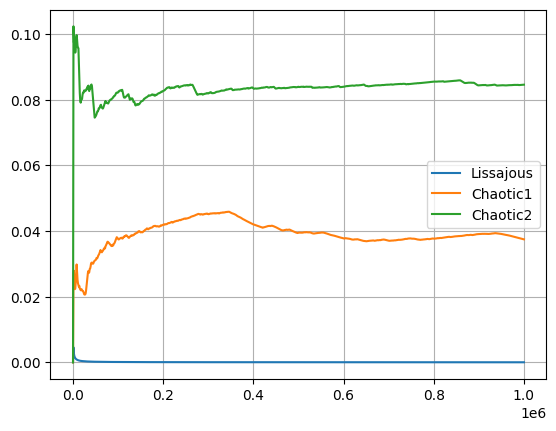

In [1]:
from numiphy.symlib.expressions import *
from numiphy.odesolvers import *
import matplotlib.pyplot as plt

def g(x0, px0=0.):
    return [x0, 0, 0, (2 - 2*Vfunc(x0, 0) - px0**2)**0.5]

t, x, y = variables('t, x, y')
eps1 = 0.35
eps2 = 0.39
a = -Rational(1, 3)

V1 = x**2/2 + y**2/2 + eps1*(x*y**2 + a*x**3)
V2 = x**2/2 + y**2/2 + eps2*(x*y**2 + a*x**3)
ch1 = HamiltonianSystem(V1, x, y)
ch2 = HamiltonianSystem(V2, x, y)

Vfunc = V1.lambdify([x, y])
orb1 = ch1.new_varorbit(g(0.5))
orb2 = ch1.new_varorbit(g(-0.05))
orb3 = ch2.new_varorbit(g(-0.5, 0.25))


orb1.get(1000000, 0.01, err=1e-10, max_frames=2, split=1000)
orb2.get(1000000, 0.01, err=1e-10, max_frames=2, split=1000)
orb3.get(1000000, 0.01, err=1e-10, max_frames=2, split=1000)

t1, ind1 = orb1.lyapunov
t2, ind2 = orb2.lyapunov
t3, ind3 = orb3.lyapunov

fig, ax = plt.subplots()
ax.plot(t1, ind1, label='Lissajous')
ax.plot(t2, ind2, label='Chaotic1')
ax.plot(t3, ind3, label='Chaotic2')
ax.grid(True)
ax.legend()

In [1]:
from numiphy.symlib.expressions import *
from numiphy.odesolvers import *
import matplotlib.pyplot as plt

t, x, y, px, py = variables('t, x, y, px, py')

symode = SymbolicOde(px, py, -x, -y, symbols=[t, x, y, px, py])
ode_fast = symode.to_lowlevel(stack=True)
ode_mid = symode.to_lowlevel(stack=False)
ode_slow = symode.to_python()
res: dict[ODE, OdeResult] = {ode_slow: None, ode_mid: None, ode_fast: None}
for ode in res:
    ode.set_ics(0, [1.3, -2.4, 3.7, 0.2])
    res[ode] = ode.solve(500, 0.1, err=1e-8, method='RK4')
    print(round(res[ode_slow].runtime / res[ode].runtime, 2), " times faster than the equivalent python code")

#normalized runtimes should be: 1, ~40 , ~150

Compiling ODE...
Done
Compiling ODE...
Done
1.0  times faster than the equivalent python code
43.13  times faster than the equivalent python code
168.11  times faster than the equivalent python code


In [17]:
np.all(res[ode_fast].func == res[ode_slow].func) #should be true. C++ and python implementation of the adaptive RK4 method are identical for numbers of the same precision.

np.True_